# Decision Trees - a simple example
This trains a very small decision tree for the Iris data set.
We will use the petal length and width to classify into the 3 classes
Setosa, Versicolor and Virginica.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,:2] # uses first two features, i.e. sepal length and width
y = iris.target
my_tree = DecisionTreeClassifier(max_depth=2)
my_tree.fit(X,y)
X.shape

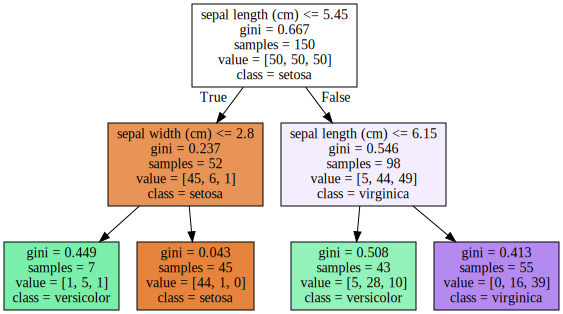

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source
import os
# This visualizes the result, using graphviz, see http://www.graphviz.org
export_graphviz(my_tree,out_file="iris_tree_sepal.dot",
                feature_names = iris.feature_names[:2],
                class_names=iris.target_names,
                filled = True
)
from google.colab import files
#files.download("iris_tree_sepal.dot")
Source.from_file("./iris_tree_sepal.dot")

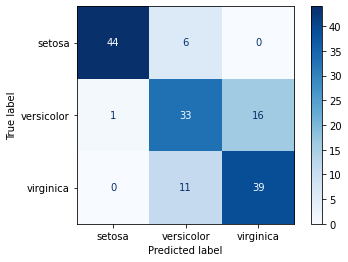

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(my_tree, X, y,
                            display_labels=iris.target_names,
                            cmap=plt.cm.Blues,
                            normalize=None)

# 6+1+16+11 = 34 errors 
#plt.savefig("iris_tree_sepal_confusion.pdf")
#files.download("iris_tree_sepal_confusion.pdf")

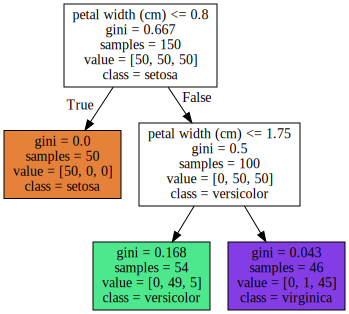

In [ ]:
X2 = iris.data[:,2:] # uses last two features, i.e. petal length and width
y2 = iris.target
my_tree2 = DecisionTreeClassifier(max_depth=2)
my_tree2.fit(X2,y2)
export_graphviz(my_tree2,out_file="iris_tree_petal.dot",
                feature_names = iris.feature_names[2:],
                class_names=iris.target_names,
                filled = True
)
#files.download("iris_tree_petal.dot")
Source.from_file("./iris_tree_petal.dot")

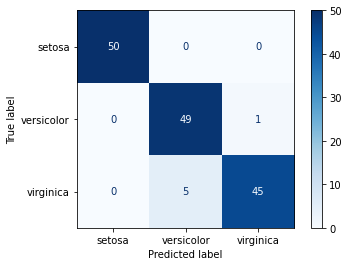

In [ ]:
disp = plot_confusion_matrix(my_tree2, X2, y2,
                            display_labels=iris.target_names,
                            cmap=plt.cm.Blues,
                            normalize=None)
# Much better ! Only 6 errors
#plt.savefig("iris_tree_petal_confusion.pdf")
#files.download("iris_tree_petal_confusion.pdf")

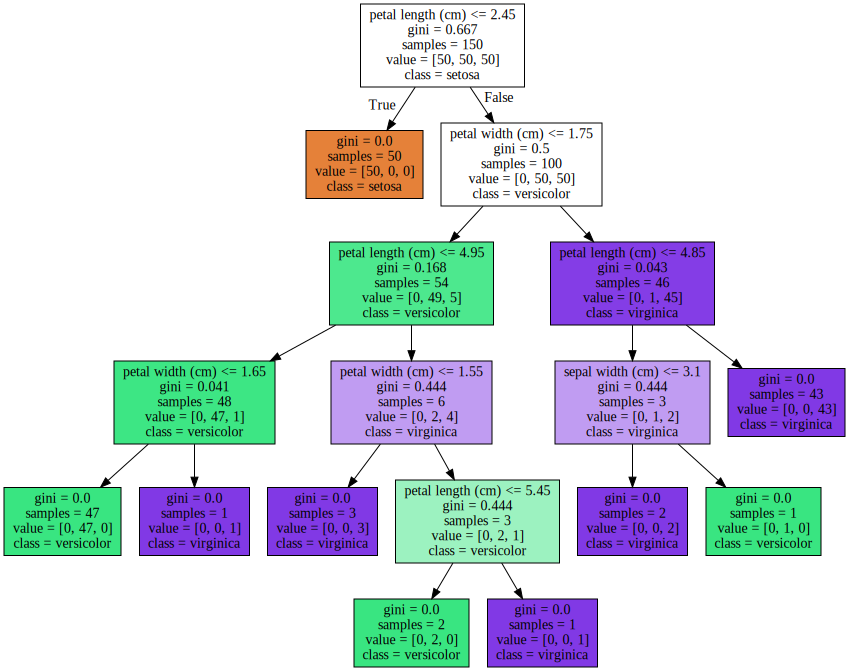

In [ ]:
X3 = iris.data[:,:] # uses last two features, i.e. petal length and width
y3 = iris.target
my_tree3 = DecisionTreeClassifier()
my_tree3.fit(X3,y3)
export_graphviz(my_tree3,out_file="iris_tree_overfit.dot",
                feature_names = iris.feature_names,
                class_names=iris.target_names,
                filled = True
)
#files.download("iris_tree_overfit.dot")
Source.from_file("./iris_tree_overfit.dot")

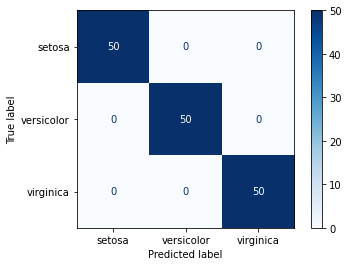

In [ ]:
disp = plot_confusion_matrix(my_tree3, X3, y3,
                            display_labels=iris.target_names,
                            cmap=plt.cm.Blues,
                            normalize=None)

Text(6, 4, 'Depth=1(right)')

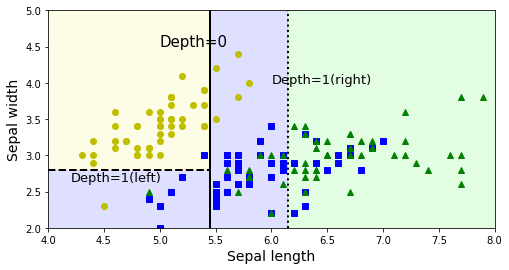

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_boundary(tree, X, y, axes=[4, 8, 2, 5]):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
    plt.axis(axes)
    plt.xlabel("Sepal length", fontsize=14)
    plt.ylabel("Sepal width", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(my_tree, X, y)
plt.plot([5.45, 5.45], [2, 5], "k-", linewidth=2)
plt.plot([4, 5.45], [2.8, 2.8], "k--", linewidth=2)
plt.plot([6.15, 6.15], [2, 5], "k:", linewidth=2)
plt.text(5, 4.5, "Depth=0", fontsize=15)
plt.text(4.2, 2.650, "Depth=1(left)", fontsize=13)
plt.text(6, 4, "Depth=1(right)", fontsize=13)
#plt.savefig("iris_tree_sepal_illustration.pdf")
#files.download("iris_tree_sepal_illustration.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

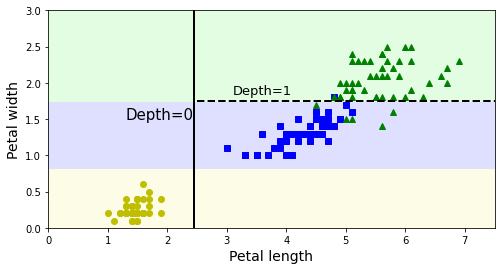

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(my_tree2, X2, y2, axes=[0 ,7.5 ,0, 3])
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.5, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.3, 1.5, "Depth=0", fontsize=15)
plt.text(3.1, 1.85, "Depth=1", fontsize=13)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.savefig("iris_tree_petal_illustration.pdf")
files.download("iris_tree_petal_illustration.pdf")